# D8TA FINAL PROJECT 
*Shreya Balaji, Rohit Manimaran, Vishal Menon*

## GOAL
Check for data privacy and fairness for the credit card dataset. In order to address these concerns our group will try to anonymize the data and assess potential biases. By doing so we hope to remove any unfair discrimination when it comes to the credit card approval process.
## DATASET SUMMARY
The credit card data set is essentially two different datasets that can be merged on the ID attribute. The first dataset is about the clients it includes general information such as whether they own a car, how many children they have, etc. The second dataset is more analytical as it only contains data on credit card history.

In [32]:
%pip install pandas numpy statsmodels matplotlib seaborn
%pip install pandas numpy statsmodels matplotlib seaborn tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import math
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## LOAD DATA

In [34]:
dfA = pd.read_csv('application_record.csv')
dfC = pd.read_csv('credit_record.csv')

In [35]:
print("Shape: ", dfA.shape)
dfA.head(5)

Shape:  (438557, 18)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [36]:
print("Shape: ", dfC.shape)
dfC.head(5)

Shape:  (1048575, 3)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


## NOTES ON DATA

### APPLICATION RECORD TABLE          

| Variable    | Description |
| ----------- | ----------- |
| ID       |  Client number   |
| CODE_GENDER   |  Gender    |
| FLAG_OWN_CAR   |  Is there a car?       |
| FLAG_OWN_REALTY   |  Is there a property?     |
| CNT_CHILDREN   |   Number of children    |
| AMT_INCOME_TOTAL   |   Annual income      |
| NAME_INCOME_TYPE   |  Income category       |
| NAME_EDUCATION_TYPE   |  Education level       |
| NAME_FAMILY_STATUS   |  Marital status       |
| NAME_HOUSING_TYPE   |  Way of living      |
| DAYS BIRTH   |  Birthday      |
| DAYS_EMPLOYED   |  Start date of employemnt     |
| FLAG_MOBIL   |  Is there a mobil?     |
| FLAG_WORK_PHONE   |  Is there a work phone?      |
| FLAG_PHONE   |  Is there a phone      |
| FLAG_EMAIL   |  Is there an email?      |
| OCCUPATION_TYPE   |  Occupation      |
| CNT_FAM_MEMBERS   |  Family type      |

## CREDIT RECORD TABLE
| Variable    | Description |
| ----------- | ----------- |
| ID       |  Client number   |
| MONTHS_BALANCE   |  The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on    |
| STATUS   |  0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month       |


## INSPECT DATA 

In [37]:
# Check dfA type and change if necessary for it to better work with our program
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [38]:
# Check dfC type and change if necessary for it to better work with our program
dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [39]:
dfC['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [40]:
# Replace X,C values with 0 as they are identified as Good clients
dfC['STATUS'].replace(['X','C'], -1,inplace=True)
dfC.STATUS = pd.to_numeric(dfC.STATUS)
dfC['STATUS'].value_counts()

-1    651261
 0    383120
 1     11090
 5      1693
 2       868
 3       320
 4       223
Name: STATUS, dtype: int64

In [41]:
dfC['STATUS'].replace([-1,0,1,2,3,4,5], [1,1,2,4,6,8,10],inplace=True)
dfC['STATUS'].value_counts()

1     1034381
2       11090
10       1693
4         868
6         320
8         223
Name: STATUS, dtype: int64

In [42]:
# Merging datasets
print(f'No. of IDs in application_record = {len(dfA.ID)} \nNo. of IDs in credit_record = {len(dfC.ID)}')

dfC.drop_duplicates(inplace=True)

df = dfA.merge(dfC, on=['ID'], how='inner')
df.drop(['ID'],inplace=True,axis=1)

# Remove duplicates
df.drop_duplicates(inplace=True)

No. of IDs in application_record = 438557 
No. of IDs in credit_record = 1048575


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332450 entries, 0 to 777714
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          332450 non-null  object 
 1   FLAG_OWN_CAR         332450 non-null  object 
 2   FLAG_OWN_REALTY      332450 non-null  object 
 3   CNT_CHILDREN         332450 non-null  int64  
 4   AMT_INCOME_TOTAL     332450 non-null  float64
 5   NAME_INCOME_TYPE     332450 non-null  object 
 6   NAME_EDUCATION_TYPE  332450 non-null  object 
 7   NAME_FAMILY_STATUS   332450 non-null  object 
 8   NAME_HOUSING_TYPE    332450 non-null  object 
 9   DAYS_BIRTH           332450 non-null  int64  
 10  DAYS_EMPLOYED        332450 non-null  int64  
 11  FLAG_MOBIL           332450 non-null  int64  
 12  FLAG_WORK_PHONE      332450 non-null  int64  
 13  FLAG_PHONE           332450 non-null  int64  
 14  FLAG_EMAIL           332450 non-null  int64  
 15  OCCUPATION_TYPE  

In [44]:
df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
count,332450.000000,3.324500e+05,332450.000000,332450.000000,332450.0,332450.000000,332450.000000,332450.000000,332450.000000,332450.000000,332450.000000
mean,0.423474,1.837333e+05,-16169.764181,61364.964410,1.0,0.222280,0.294381,0.086903,2.194643,-22.002861,1.074880
std,0.757505,1.008327e+05,4147.687833,139525.743984,0.0,0.415779,0.455765,0.281694,0.920080,15.140524,0.635677
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,1.000000
25%,0.000000,1.125000e+05,-19619.000000,-3200.000000,1.0,0.000000,0.000000,0.000000,2.000000,-33.000000,1.000000
50%,0.000000,1.575000e+05,-15843.000000,-1546.000000,1.0,0.000000,0.000000,0.000000,2.000000,-20.000000,1.000000
75%,1.000000,2.250000e+05,-12699.000000,-374.000000,1.0,0.000000,1.000000,0.000000,3.000000,-9.000000,1.000000
max,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,10.000000


In [45]:
# Change all flags from Y/N to binary (0/1)
df['FLAG_OWN_CAR'].replace(['Y','N'], [1,0],inplace=True)
df['FLAG_OWN_REALTY'].replace(['Y','N'], [1,0],inplace=True)
df['FLAG_MOBIL'].replace(['Y','N'], [1,0],inplace=True)
df['FLAG_WORK_PHONE'].replace(['Y','N'], [1,0],inplace=True)
df['FLAG_PHONE'].replace(['Y','N'], [1,0],inplace=True)
df['FLAG_EMAIL'].replace(['Y','N'], [1,0],inplace=True)
df.head(100)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,1
1,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,1
2,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,1
3,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,1
4,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,F,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,-12,1
146,F,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,-13,1
147,F,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,-14,1
148,F,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,-15,1


## MISSING VALUES

In [46]:
df.isna().sum()

CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        103273
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

## EXPLORATORY ANALYSIS

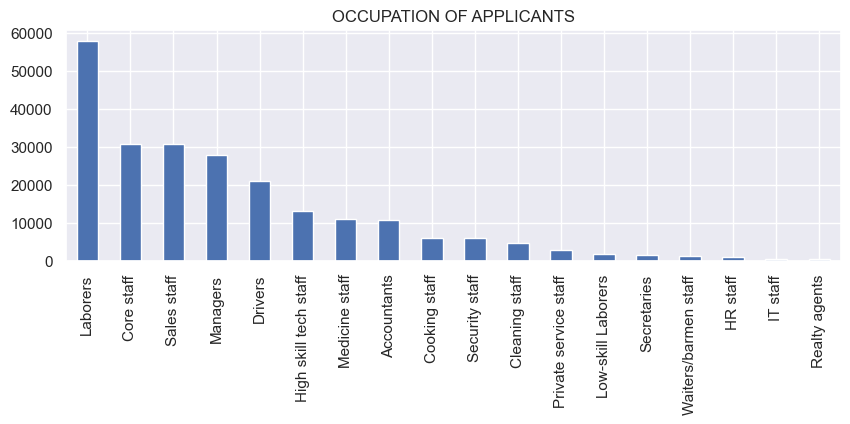

In [47]:
plt.title("OCCUPATION OF APPLICANTS")
df.OCCUPATION_TYPE.value_counts().plot(kind='bar', stacked=True)
plt.show()

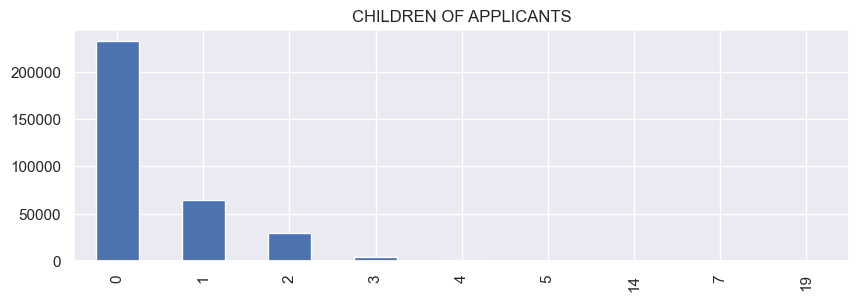

In [48]:
plt.title("CHILDREN OF APPLICANTS")
df.CNT_CHILDREN.value_counts().plot(kind='bar', stacked=True)
plt.show()

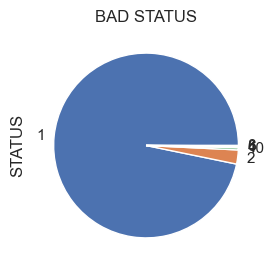

In [49]:
plt.title("BAD STATUS")
df.STATUS.value_counts().plot(kind='pie', stacked=True)
plt.show()

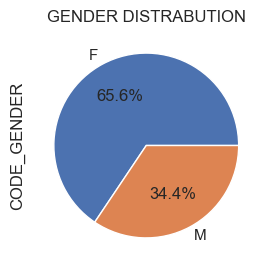

In [50]:
plt.title("GENDER DISTRABUTION")
df.CODE_GENDER.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [51]:
df.NAME_HOUSING_TYPE.value_counts()

House / apartment      298695
With parents            14438
Municipal apartment     11076
Rented apartment         4298
Office apartment         2598
Co-op apartment          1345
Name: NAME_HOUSING_TYPE, dtype: int64

<AxesSubplot: >

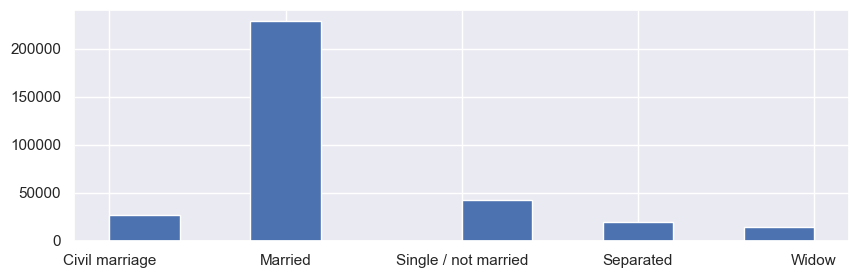

In [52]:
df['NAME_FAMILY_STATUS'].hist()

<AxesSubplot: xlabel='NAME_INCOME_TYPE', ylabel='count'>

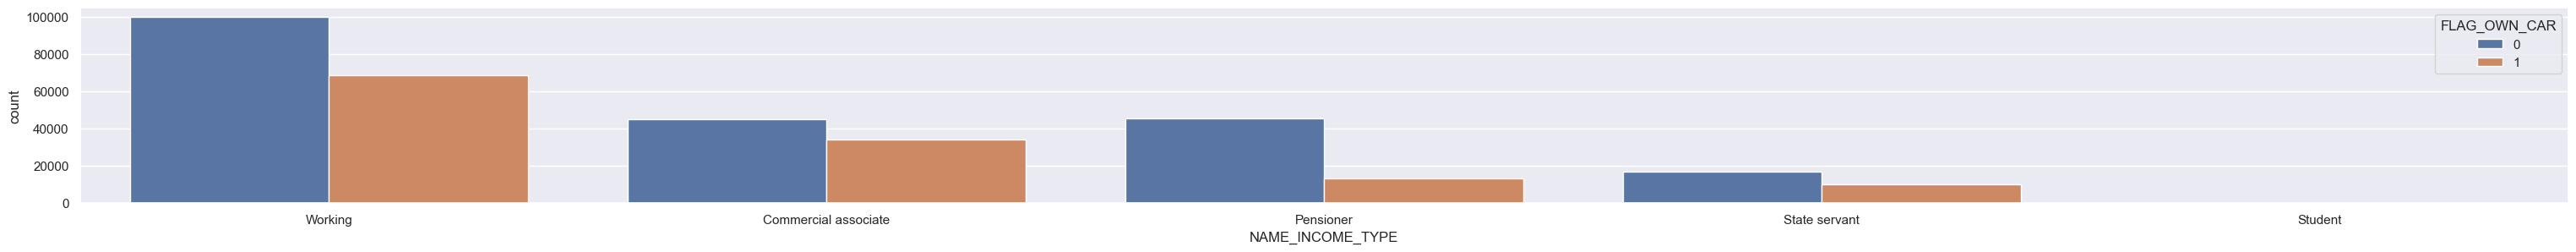

In [53]:
sns.set(rc={'figure.figsize':(38,3)})
sns.countplot(x='NAME_INCOME_TYPE',hue='FLAG_OWN_CAR',data=df)

<AxesSubplot: xlabel='OCCUPATION_TYPE', ylabel='count'>

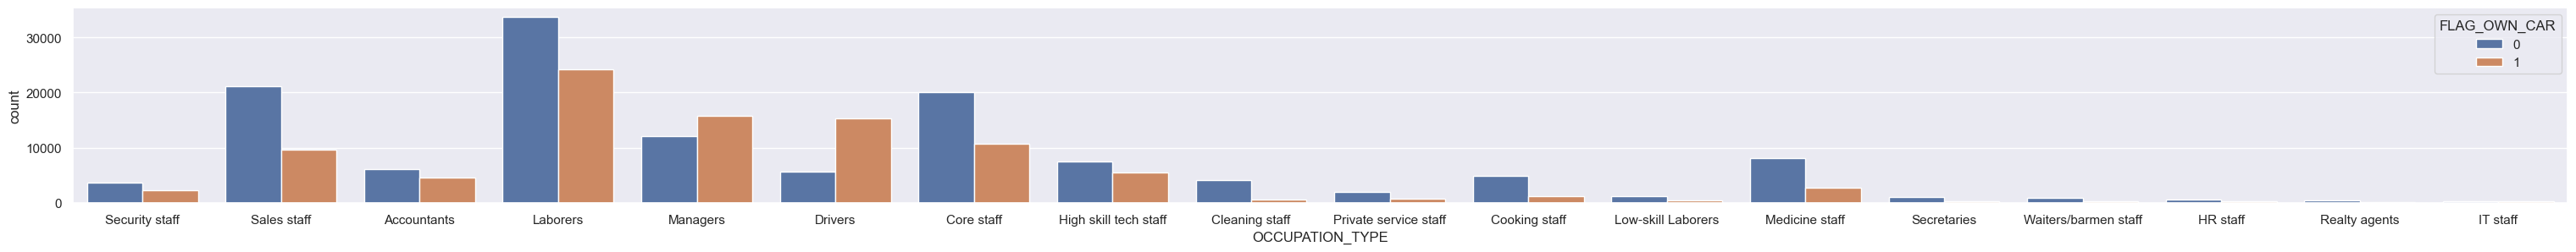

In [54]:
sns.set(rc={'figure.figsize':(38,3)})
sns.countplot(x='OCCUPATION_TYPE',hue='FLAG_OWN_CAR',data=df)

(19.951, 24.8]    0.015398
(24.8, 29.6]      0.102292
(29.6, 34.4]      0.138273
(34.4, 39.2]      0.143252
(39.2, 44.0]      0.144750
(44.0, 48.8]      0.096207
(48.8, 53.6]      0.115720
(53.6, 58.4]      0.113882
(58.4, 63.2]      0.094492
(63.2, 68.0]      0.035735
Name: Age, dtype: float64


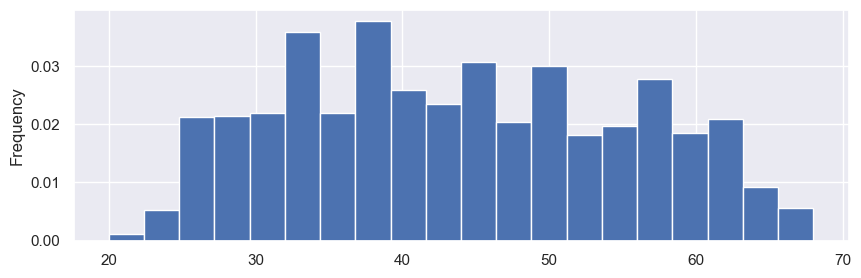

In [55]:
sns.set(rc={'figure.figsize':(10,3)})
df['Age']=-(df['DAYS_BIRTH'])//365	
print(df['Age'].value_counts(bins=10,normalize=True,sort=False))
df['Age'].plot(kind='hist',bins=20,density=True)
plt.show()

<AxesSubplot: xlabel='CODE_GENDER', ylabel='AMT_INCOME_TOTAL'>

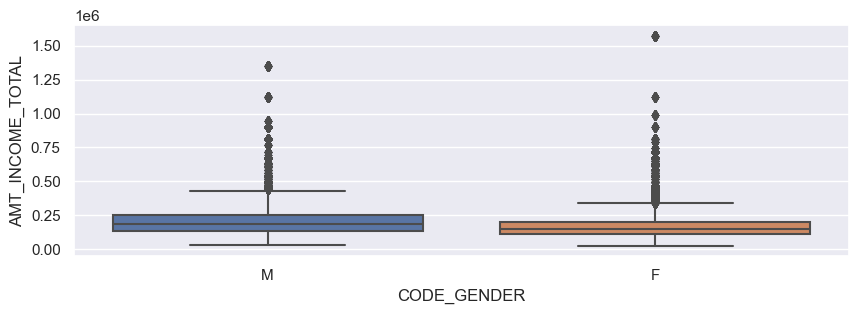

In [56]:
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=df)

In [57]:
df.describe()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Age
count,332450.000000,332450.000000,332450.000000,3.324500e+05,332450.000000,332450.000000,332450.0,332450.000000,332450.000000,332450.000000,332450.000000,332450.000000,332450.000000,332450.000000
mean,0.378096,0.662761,0.423474,1.837333e+05,-16169.764181,61364.964410,1.0,0.222280,0.294381,0.086903,2.194643,-22.002861,1.074880,43.794709
std,0.484912,0.472768,0.757505,1.008327e+05,4147.687833,139525.743984,0.0,0.415779,0.455765,0.281694,0.920080,15.140524,0.635677,11.367155
min,0.000000,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,1.000000,20.000000
25%,0.000000,0.000000,0.000000,1.125000e+05,-19619.000000,-3200.000000,1.0,0.000000,0.000000,0.000000,2.000000,-33.000000,1.000000,34.000000
50%,0.000000,1.000000,0.000000,1.575000e+05,-15843.000000,-1546.000000,1.0,0.000000,0.000000,0.000000,2.000000,-20.000000,1.000000,43.000000
75%,1.000000,1.000000,1.000000,2.250000e+05,-12699.000000,-374.000000,1.0,0.000000,1.000000,0.000000,3.000000,-9.000000,1.000000,53.000000
max,1.000000,1.000000,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,10.000000,68.000000


Correlation Analysis

In [58]:
import pandas as pd

# select only the numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# extract the correlation values between "STATUS" and the other columns
corr_with_status = corr_matrix['STATUS']

# print the correlation values in descending order
print(corr_with_status.sort_values(ascending=False))


STATUS              1.000000
AMT_INCOME_TOTAL    0.015436
FLAG_PHONE          0.014708
MONTHS_BALANCE      0.014317
FLAG_WORK_PHONE     0.011444
FLAG_OWN_CAR        0.003159
CNT_CHILDREN        0.002917
FLAG_EMAIL          0.001724
DAYS_BIRTH          0.001656
CNT_FAM_MEMBERS     0.001453
Age                -0.001724
DAYS_EMPLOYED      -0.004411
FLAG_OWN_REALTY    -0.007585
FLAG_MOBIL               NaN
Name: STATUS, dtype: float64


Overall, the correlations are weak, indicating that there may not be strong relationships between the "STATUS" variable and the other numeric variables in the dataset. However, it is still useful to consider these correlations when analyzing the dataset.

## LABELING

#### Sources
Calculating minimum cost of raising a child in the US:
https://www.washingtonpost.com/business/interactive/2022/cost-raising-child-calculator/

As of 2022, the minimum cost to raise a child in the US is $17,000/year.

Calculating the minimum cost of owning a car in the US:
https://www.bankrate.com/insurance/car/cost-of-car-ownership/#:~:text=The%20cost%20of%20owning%20a%20car%20also%20includes%20insurance%2C%20gas,AAA's%20Your%20Driving%20Costs%20study.

As of 2022, the minimum cost of owning a car in the US is $10,728/year.

Calculating the minnimum cost of owning a phone in the US: 
https://www.whistleout.com/CellPhones/Guides/average-phone-plan-price#:~:text=Using%20the%20trend%20line%20from,%2Fmonth%20or%20%241%2C371%2Fyear.

As of 2022, the minimum cost of owning a phone in the US is $1,371/year.
Assumption: most people only have cellphones, household phone are not as common.

Calculating the minimum ampount spent on housing in the US:
https://www.bankrate.com/banking/savings/average-household-budget/#:~:text=Average%20cost%20of%20housing,%2422%2C624%20that%20year%20on%20housing.

As of 2022, the minimum amount of housing in the US is $22,624.

#### Equation 
Income - ((Avg cost of child * # of children) + Avg cost of car ownership (flag) + Avg cost of owning a phone (flag) + Avg cost of housing)

| Variable    | Description |
| ----------- | ----------- |
| AMT_INCOME_TOTAL       |  Income   |
| CNT_CHILDREN       |  # of children   |
| FLAG_OWN_CAR       |  flag for car   |
| FLAG_PHONE       |  flag for phone   |


In [59]:
# Calculating cost of living
# cost of living per person
df['allowence'] = df['AMT_INCOME_TOTAL'] - (17000 * df['CNT_CHILDREN']) - (10728 * df['FLAG_OWN_CAR']) - (1371 * df['FLAG_PHONE']) - 22624
# Risk is similar to credit score
df['risk'] = (df['allowence'].apply(abs))/df['AMT_INCOME_TOTAL']
df['risk'] = df['risk'].round(2)
# credit card companies are predatory so instead of making the cutt off 0.5 it will be 0.43 - value was determined using avg number of rejected applicants
# all values used in refence to decidng # of applicant that should be approved are from : https://www.newyorkfed.org/newsevents/news/research/2022/20221121#:~:text=Rejection%20Rates%3A&text=The%20average%20rejection%20rate%20on,2022%20from%2032.3%25%20in%202021.
df['credit_quality'] = df['risk'].apply(lambda x: 1 if x >= 0.5 else 0)
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Age,allowence,risk,credit_quality
0,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,0,0,NaN,2.0,0,1,32,394148.0,0.92,1
1,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,0,0,NaN,2.0,-1,1,32,394148.0,0.92,1
2,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,0,0,NaN,2.0,-2,1,32,394148.0,0.92,1
3,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,0,0,NaN,2.0,-3,1,32,394148.0,0.92,1
4,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,0,0,NaN,2.0,-4,1,32,394148.0,0.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,M,0,1,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,...,0,0,Laborers,1.0,-9,1,25,89876.0,0.80,1
777711,M,0,1,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,...,0,0,Laborers,1.0,-10,4,25,89876.0,0.80,1
777712,M,0,1,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,...,0,0,Laborers,1.0,-11,2,25,89876.0,0.80,1
777713,M,0,1,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,...,0,0,Laborers,1.0,-12,1,25,89876.0,0.80,1


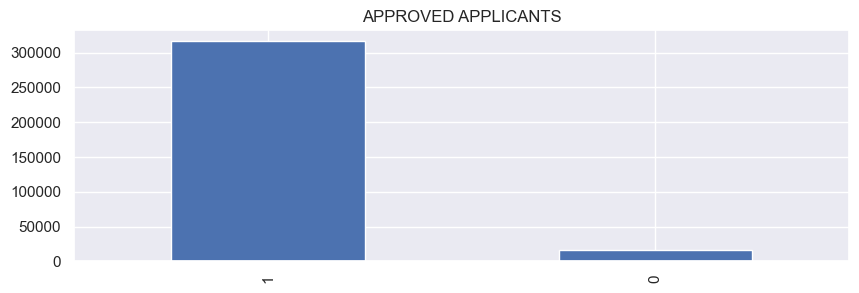

In [60]:
plt.title("APPROVED APPLICANTS")
df.credit_quality.value_counts().plot(kind='bar', stacked=True)
plt.show()

## CALCULATING EPSILON

Epoch 1/5
8312/8312 [==============================] - 20s 2ms/step - loss: 0.0809 - accuracy: 0.9797 - val_loss: 0.0288 - val_accuracy: 0.9978
Epoch 2/5
8312/8312 [==============================] - 20s 2ms/step - loss: 0.0335 - accuracy: 0.9940 - val_loss: 0.0215 - val_accuracy: 0.9986
Epoch 3/5
8312/8312 [==============================] - 21s 3ms/step - loss: 0.0278 - accuracy: 0.9946 - val_loss: 0.0202 - val_accuracy: 0.9980
Epoch 4/5
8312/8312 [==============================] - 19s 2ms/step - loss: 0.0254 - accuracy: 0.9936 - val_loss: 0.0165 - val_accuracy: 0.9985
Epoch 5/5
8312/8312 [==============================] - 14s 2ms/step - loss: 0.0236 - accuracy: 0.9939 - val_loss: 0.0194 - val_accuracy: 0.9971


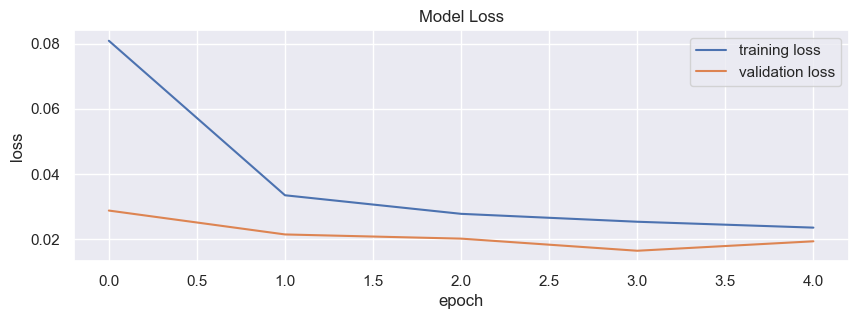

2078/2078 [==============================] - 2s 930us/step


,Predicted Negative,Predicted Positive
True Negative,0.048097,0.000301
True Positive,0.002647,0.948955


In [61]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset into a Pandas dataframe

# Split the dataset into features and target variable
X = df[['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'FLAG_OWN_CAR', 'FLAG_PHONE']]
y = df['credit_quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001), input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.L2(0.001), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_test_scaled, y_test))

# Plot the loss graph
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Generate predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Convert predicted probabilities to predicted class labels
y_pred_labels = (y_pred > 0.5).astype(int)

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)
conf_mat_df = pd.DataFrame(conf_mat / len(y_test), 
                            columns=['Predicted Negative', 'Predicted Positive'], 
                            index=['True Negative', 'True Positive'])
conf_mat_df.style.background_gradient(cmap='Blues')

In [62]:
# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_labels)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[ 3198    20]
 [  176 63096]]


## DIFFERENTIAL PRIVACY - USING NOISE

Running and Evaluating Model with Differential Privacy

In [63]:
epsilon_values = [0.001, 0.01, 0.1, 1.0, 10]
sensitivity = {'CNT_CHILDREN': 3, 'FLAG_OWN_CAR': 1, 'FLAG_PHONE': 1}
results_dict = {}

for epsilon in epsilon_values:
    df_epsilon_copy = df.copy()
    # Add Laplace noise to each numerical column
    numerical_cols = ['CNT_CHILDREN', 'FLAG_OWN_CAR', 'FLAG_PHONE']
    scale = [sensitivity[col] / epsilon for col in numerical_cols]
    noise = np.random.laplace(loc=0, scale=scale, size=(len(df_epsilon_copy), len(numerical_cols)))
    df_epsilon_copy[numerical_cols] += noise

    # Split the dataset into features and target variable
    X = df_epsilon_copy[['AMT_INCOME_TOTAL', 'CNT_CHILDREN', 'FLAG_OWN_CAR', 'FLAG_PHONE']]
    y = df_epsilon_copy['credit_quality']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the neural network model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.001),input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.L2(0.001),activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    optimizer = tf.keras.optimizers.SGD(momentum=0.9)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_test_scaled, y_test))

    # Generate predictions on the testing set
    y_pred = model.predict(X_test_scaled)

    # Convert predicted probabilities to predicted class labels
    y_pred_labels = (y_pred > 0.5).astype(int)

    # Create confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred_labels)
    
    # Store the results for this epsilon value in the dictionary
    results_dict[epsilon] = {
        'accuracy': history.history['accuracy'][-1],
        'loss': history.history['loss'][-1],
        'val_accuracy': history.history['val_accuracy'][-1],
        'val_loss': history.history['val_loss'][-1],
        'confusion_matrix': conf_mat,
    }


Epoch 1/5
8312/8312 [==============================] - 18s 2ms/step - loss: 0.1696 - accuracy: 0.9506 - val_loss: 0.1444 - val_accuracy: 0.9516
Epoch 2/5
8312/8312 [==============================] - 15s 2ms/step - loss: 0.1497 - accuracy: 0.9516 - val_loss: 0.1420 - val_accuracy: 0.9516
Epoch 3/5
8312/8312 [==============================] - 15s 2ms/step - loss: 0.1486 - accuracy: 0.9516 - val_loss: 0.1425 - val_accuracy: 0.9516
Epoch 4/5
8312/8312 [==============================] - 16s 2ms/step - loss: 0.1478 - accuracy: 0.9518 - val_loss: 0.1420 - val_accuracy: 0.9516
Epoch 5/5
2078/2078 [==============================] - 2s 902us/step
Epoch 1/5
8312/8312 [==============================] - 15s 2ms/step - loss: 0.1665 - accuracy: 0.9513 - val_loss: 0.1422 - val_accuracy: 0.9516
Epoch 2/5
8312/8312 [==============================] - 16s 2ms/step - loss: 0.1482 - accuracy: 0.9516 - val_loss: 0.1412 - val_accuracy: 0.9516
Epoch 3/5
8312/8312 [==============================] - 16s 2ms/step

In [64]:
result_df = pd.DataFrame.from_dict(results_dict)
display(result_df)

,0.001,0.010,0.100,1.000,10.000
accuracy,0.951989,0.951846,0.952068,0.951959,0.979715
loss,0.147659,0.146174,0.146124,0.143276,0.06085
val_accuracy,0.951602,0.951602,0.952354,0.951602,0.981606
val_loss,0.141797,0.140999,0.139659,0.136558,0.053855
confusion_matrix,"[[0, 3218], [0, 63272]]","[[0, 3218], [0, 63272]]","[[50, 3168], [0, 63272]]","[[0, 3218], [0, 63272]]","[[2497, 721], [502, 62770]]"


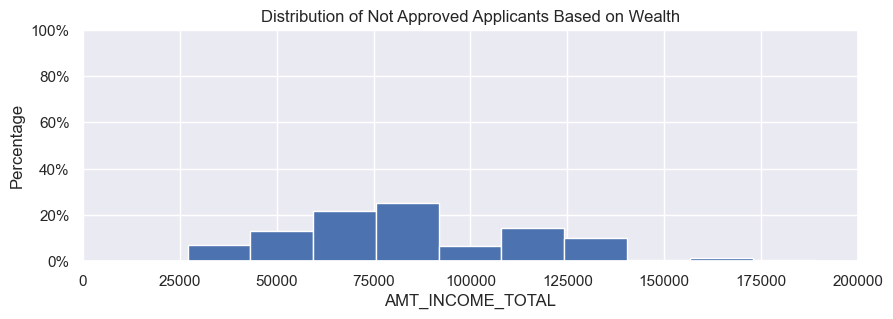

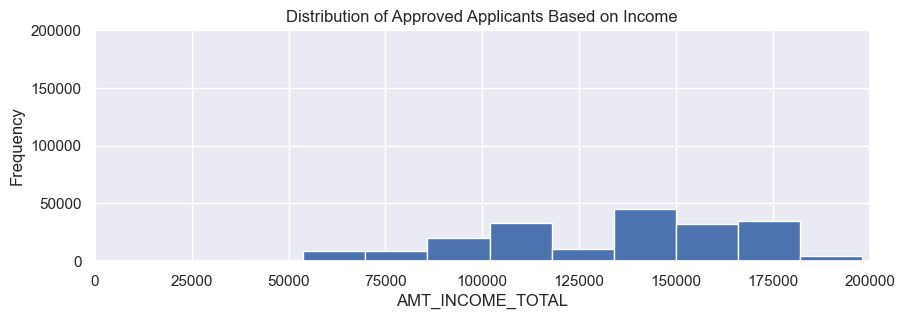

In [65]:
import matplotlib.ticker as mtick

# Filter dataframe to only include not approved records
not_approved_df = df[(df['credit_quality'] == 0) & (df['AMT_INCOME_TOTAL'] < 200000)]

# Calculate the total number of records in not_approved_df
total_not_approved = len(not_approved_df)

# Plot histogram of AMT_INCOME_TOTAL for not approved records
counts, bins, patches = plt.hist(not_approved_df['AMT_INCOME_TOTAL'], bins=10)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Percentage')
plt.title('Distribution of Not Approved Applicants Based on Wealth')
plt.xlim([0, 200000]) # set the same x-axis range as the previous plot
plt.ylim([0, 100]) # set the y-axis to show percentages
for patch in patches:
    height = patch.get_height()
    percentage = (height / total_not_approved) * 100
    patch.set_height(percentage)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter()) # format y-axis as percentages
plt.show()


# Filter dataframe to only include approved records
approved_df = df[(df['credit_quality'] == 1) & (df['AMT_INCOME_TOTAL'] < 200000)]

# Plot histogram of AMT_INCOME_TOTAL for approved records
plt.hist(approved_df['AMT_INCOME_TOTAL'], bins=10)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.title('Distribution of Approved Applicants Based on Income')
plt.xlim([0, 200000]) # set the same x-axis range as the previous plot
plt.ylim([0, 200000])
plt.show()


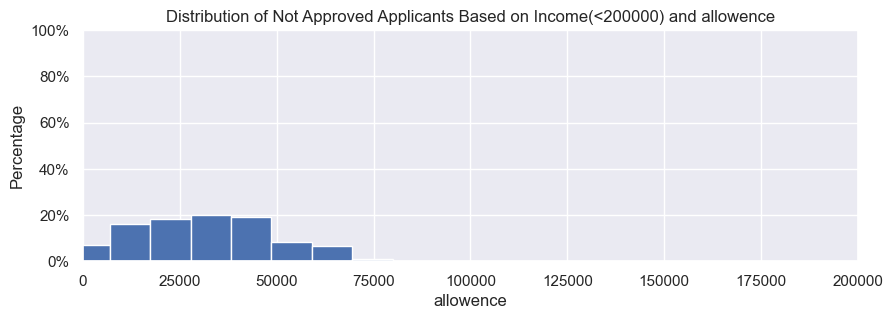

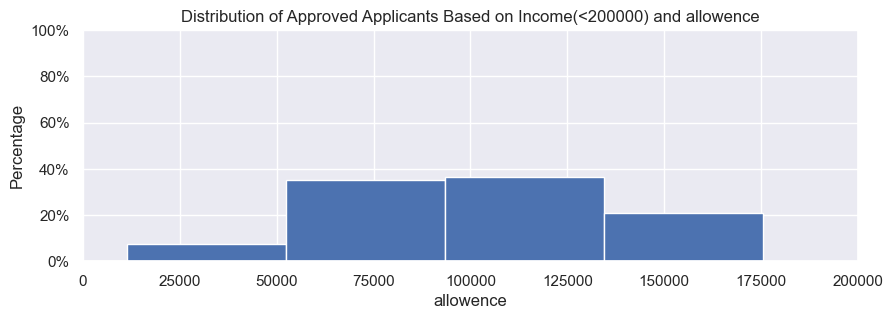

In [66]:
import matplotlib.ticker as mtick

# Calculate the total number of records in each dataframe
total_not_approved = len(not_approved_df)
total_approved = len(approved_df)

# Plot histogram of AMT_INCOME_TOTAL for not approved records
counts, bins, patches = plt.hist(not_approved_df['allowence'], bins=10)
plt.xlabel('allowence')
plt.ylabel('Percentage')
plt.title('Distribution of Not Approved Applicants Based on Income(<200000) and allowence')
plt.xlim([0, 200000]) # set the same x-axis range as the previous plot
plt.ylim([0, 100]) # set the y-axis to show percentages
for patch in patches:
    height = patch.get_height()
    percentage = (height / total_not_approved) * 100
    patch.set_height(percentage)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter()) # format y-axis as percentages
plt.show()

# Plot histogram of AMT_INCOME_TOTAL for approved records
counts, bins, patches = plt.hist(approved_df['allowence'], bins=10)
plt.xlabel('allowence')
plt.ylabel('Percentage')
plt.title('Distribution of Approved Applicants Based on Income(<200000) and allowence')
plt.xlim([0, 200000]) # set the same x-axis range as the previous plot
plt.ylim([0, 100]) # set the y-axis to show percentages
for patch in patches:
    height = patch.get_height()
    percentage = (height / total_approved) * 100
    patch.set_height(percentage)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter()) # format y-axis as percentages
plt.show()
